<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/01_Sales_Supermarket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Features in the Dataset:
1. **Invoice ID**: Unique identifier for each transaction.
2. **Branch**: The branch of the supermarket where the transaction occurred.
3. **City**: The city where the supermarket is located.
4. **Customer type**: Whether the customer is a member or a normal customer.
5. **Gender**: Gender of the customer.
6. **Product line**: Category of the product purchased.
7. **Unit price**: Price of a single unit of the product.
8. **Quantity**: Number of units purchased.
9. **Tax 5%**: Tax amount for the transaction (5% of the total).
10. **Total**: Total amount including tax.
11. **Date**: Date of the transaction.
12. **Time**: Time of the transaction.
13. **Payment**: Payment method used.
14. **COGS (Cost of Goods Sold)**: Cost of goods sold.
15. **Gross margin percentage**: Gross margin percentage for the transaction.
16. **Gross income**: Gross income for the supermarket from the transaction.
17. **Rating**: Customer satisfaction rating for the transaction.

### Target Variable:
- **Total**: Represents the sales amount.

### Potential Problem Statement:
"Predicting Total Sales in a Supermarket based on Transactional Data"

### Objectives:
1. Develop a predictive model to forecast total sales based on historical transactional information.
2. Identify key factors (such as product line, customer type, time of transaction, etc.) that significantly impact sales.
3. Optimize inventory management and marketing strategies by understanding sales patterns and influential factors.


In [80]:
import pandas as pd
import numpy as np
import scipy.stats as stats


import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define data types for columns
datatypes = {
    'Rating': 'float16',
    'gross income': 'float32',
    'cogs': 'float32',
    'Payment': 'category',
    'Quantity': 'int32',
    'Unit price': 'float32',
    'Product line': 'category',
    'Gender': 'category',
    'Customer type': 'category',
    'City': 'category',
    'Branch': 'category'
}

# Read the CSV file, parsing the 'Date' column as dates and specifying data types
df = pd.read_csv('/content/drive/MyDrive/DataSets/supermarket_sales - Sheet1.csv', parse_dates=['Date']).astype(datatypes).drop('Invoice ID',axis=1)


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/supermarket_sales - Sheet1.csv', parse_dates=['Date'])

In [5]:
df.shape

(1000, 17)

In [6]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
210,888-02-0338,A,Yangon,Normal,Male,Electronic accessories,26.23,9,11.8035,247.8735,2019-01-25,20:24,Ewallet,236.07,4.761905,11.8035,5.9
701,176-64-7711,B,Mandalay,Normal,Male,Food and beverages,32.32,3,4.8480,101.8080,2019-03-27,19:11,Credit card,96.96,4.761905,4.8480,4.3
671,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.3400,196.1400,2019-03-30,16:34,Cash,186.80,4.761905,9.3400,5.5
22,273-16-6619,B,Mandalay,Normal,Male,Home and lifestyle,33.20,2,3.3200,69.7200,2019-03-15,12:20,Credit card,66.40,4.761905,3.3200,4.4
168,796-32-9050,A,Yangon,Normal,Male,Food and beverages,51.28,6,15.3840,323.0640,2019-01-19,16:31,Cash,307.68,4.761905,15.3840,6.5


In [7]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

Original size = 132.9
Optimized size = 69.3

Reduction in size = 132.9 - 69.3 = 63.6
Percentage reduction = (63.6 / 132.9) * 100 ≈ 47.88%


In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


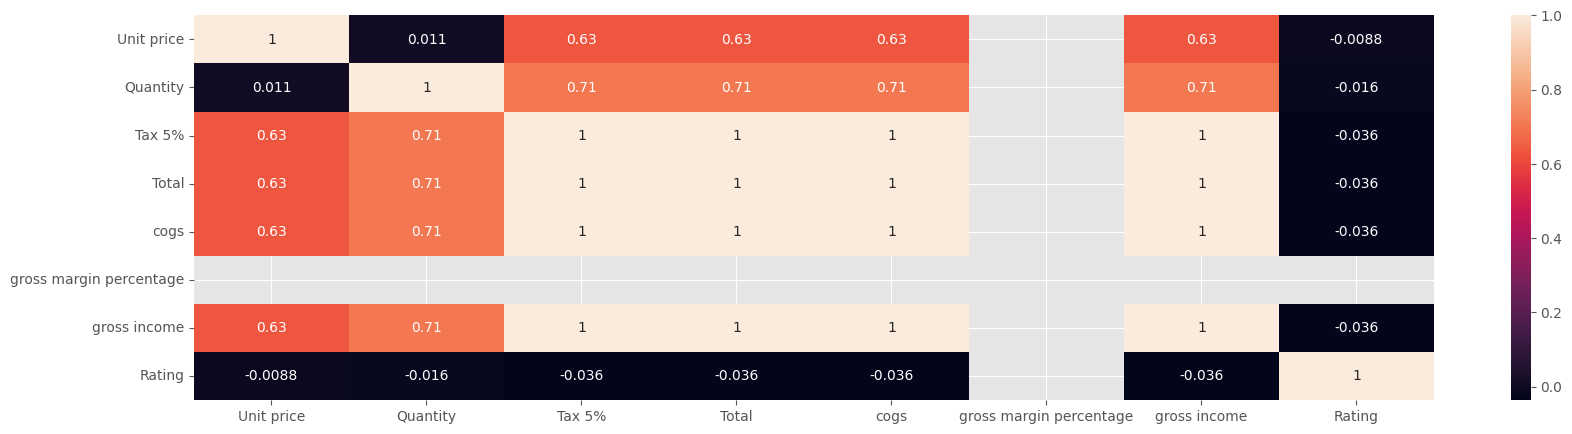

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
df.duplicated().sum()

0

## Observations:
  - Multicolineariy
  - Skewed Distributions
  - No duplicated values
  - No of observation 1000
  - No Null values

In [12]:
NumericalFeatures = list()
CategoricalFeatures = list()

for feature in df.columns:
  if str(df[feature].dtype).__contains__('int') or str(df[feature].dtype).__contains__('float'):
    NumericalFeatures.append(feature)
  elif str(df[feature].dtype).__contains__('category') or str(df[feature].dtype).__contains__('object'):
    CategoricalFeatures.append(feature)
  else:
    pass


In [13]:
NumericalFeatures,CategoricalFeatures

(['Unit price',
  'Quantity',
  'Tax 5%',
  'Total',
  'cogs',
  'gross margin percentage',
  'gross income',
  'Rating'],
 ['Invoice ID',
  'Branch',
  'City',
  'Customer type',
  'Gender',
  'Product line',
  'Time',
  'Payment'])

In [14]:
def ShowNumericFeatureProperties(feature):
  fig, ax = plt.subplots(1,3,figsize=(20,5))
  fig.suptitle(f'Properties of {feature}')
  ax[0].set_title(f'Distribution of {feature}')
  sns.distplot(df[feature],ax=ax[0])

  ax[1].set_title(f'Boxplot of {feature}')
  sns.boxplot(df[feature],ax=ax[1])

  ax[2].set_title(f'Probability plot of {feature}')
  stats.probplot(df[feature],plot=ax[2])
  plt.show()


def ShowCategoricalFeatureProperties(feature):
  counts = df[feature].value_counts()
  fig, ax = plt.subplots(1,2,figsize=(20, 5))
  fig.suptitle(f'Properties of {feature}')
  ax[0].set_title(f'Countplot of {feature}')
  sns.barplot(x=counts.index, y=counts.values,ax=ax[0])

  ax[1].set_title(f'Pieplot of {feature}')
  df[feature].value_counts().plot(kind='pie',autopct='%.2f')

  fig.show()

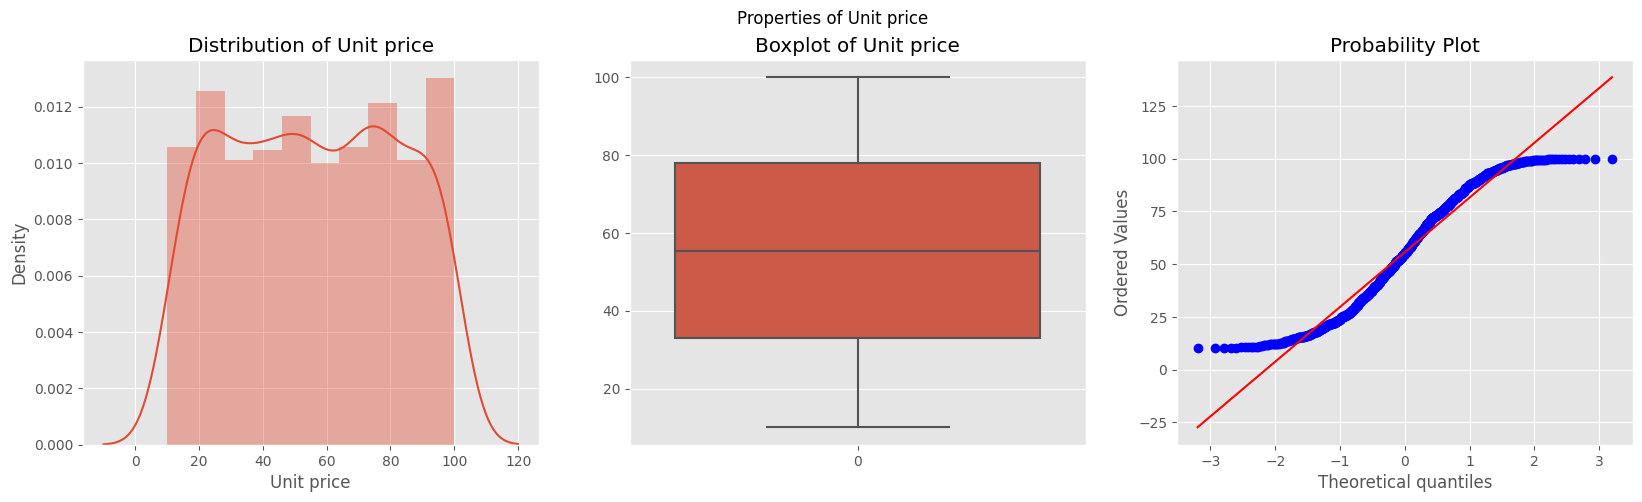

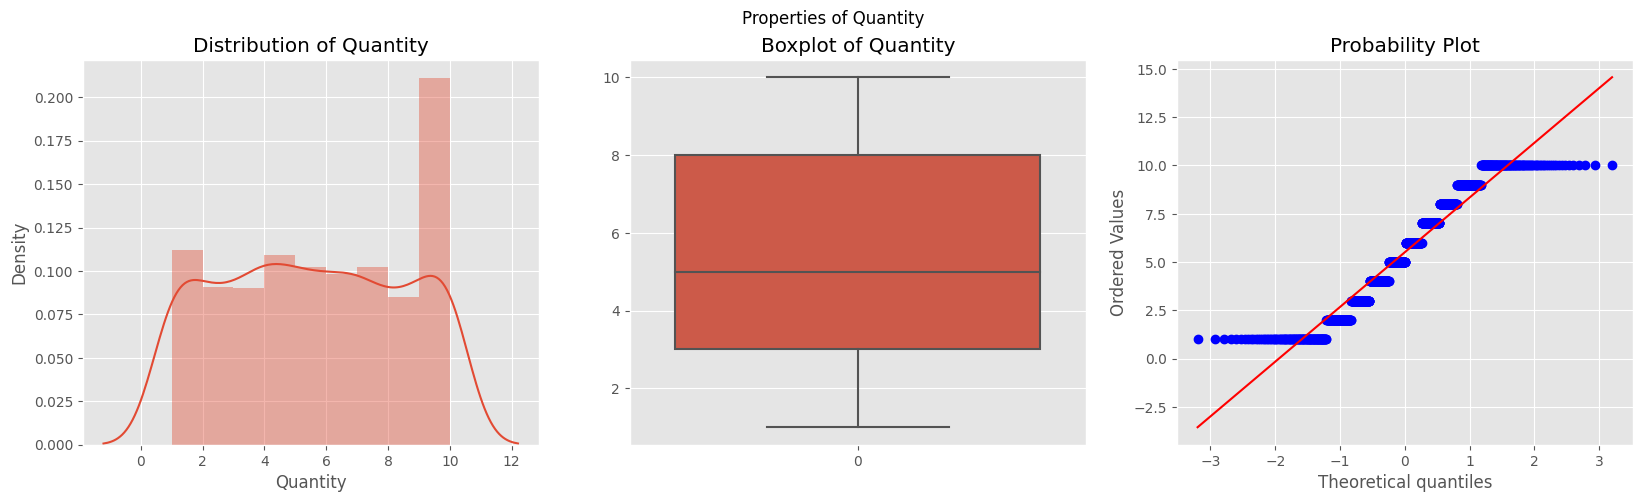

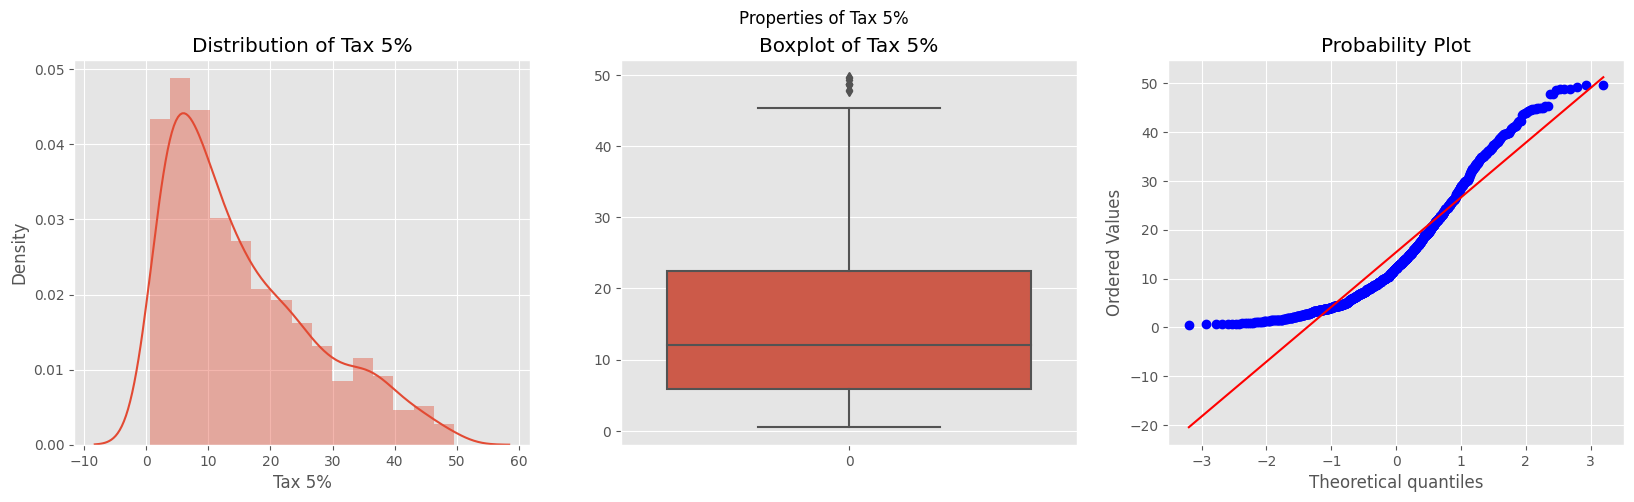

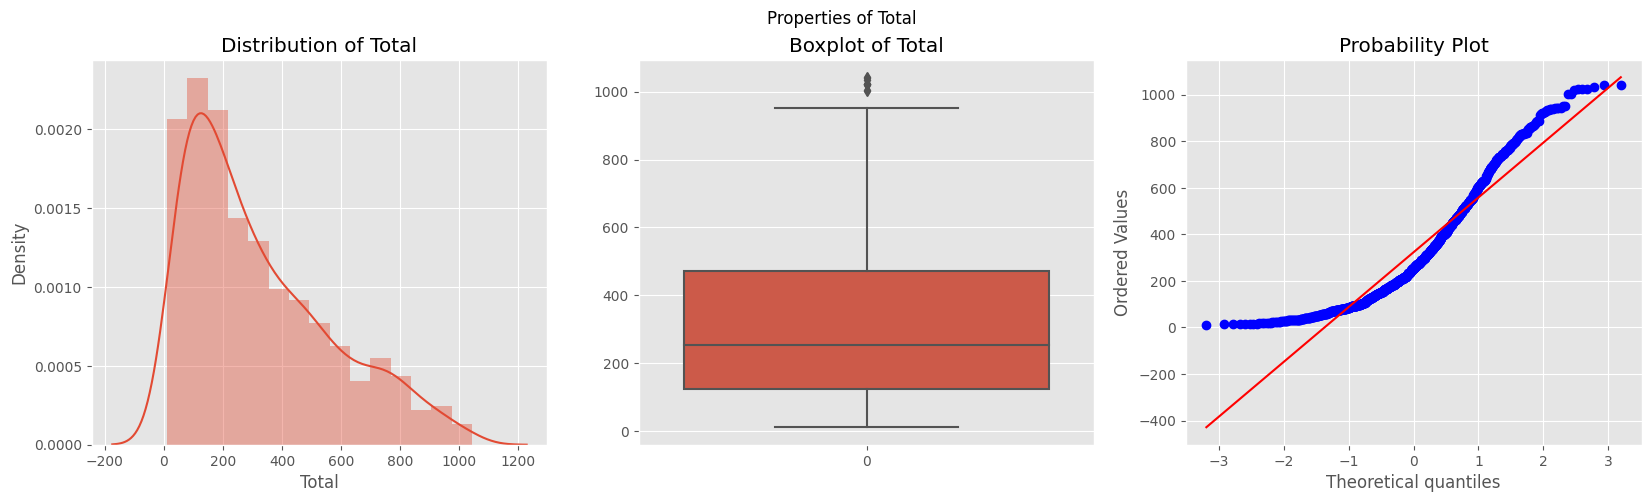

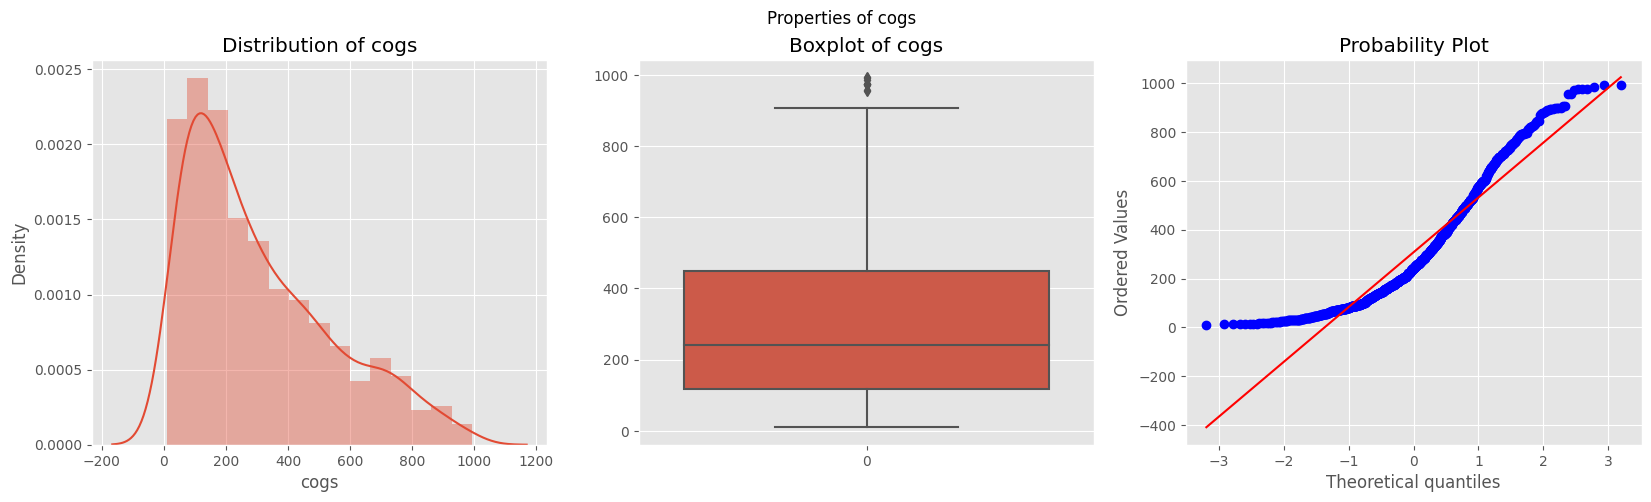

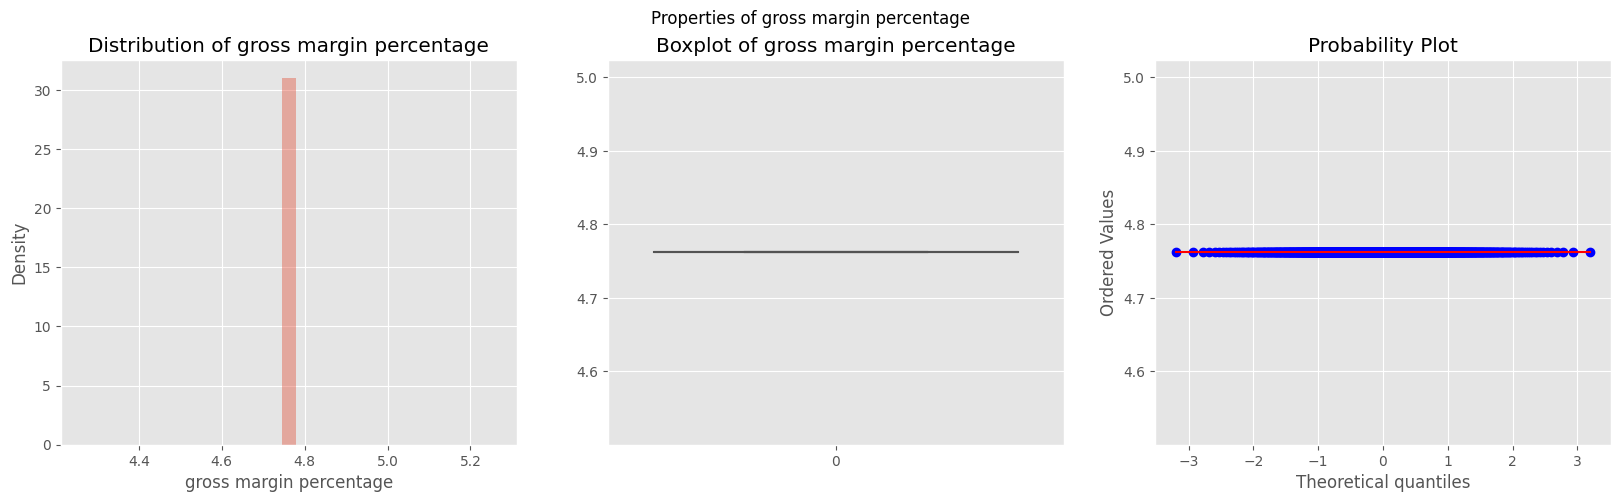

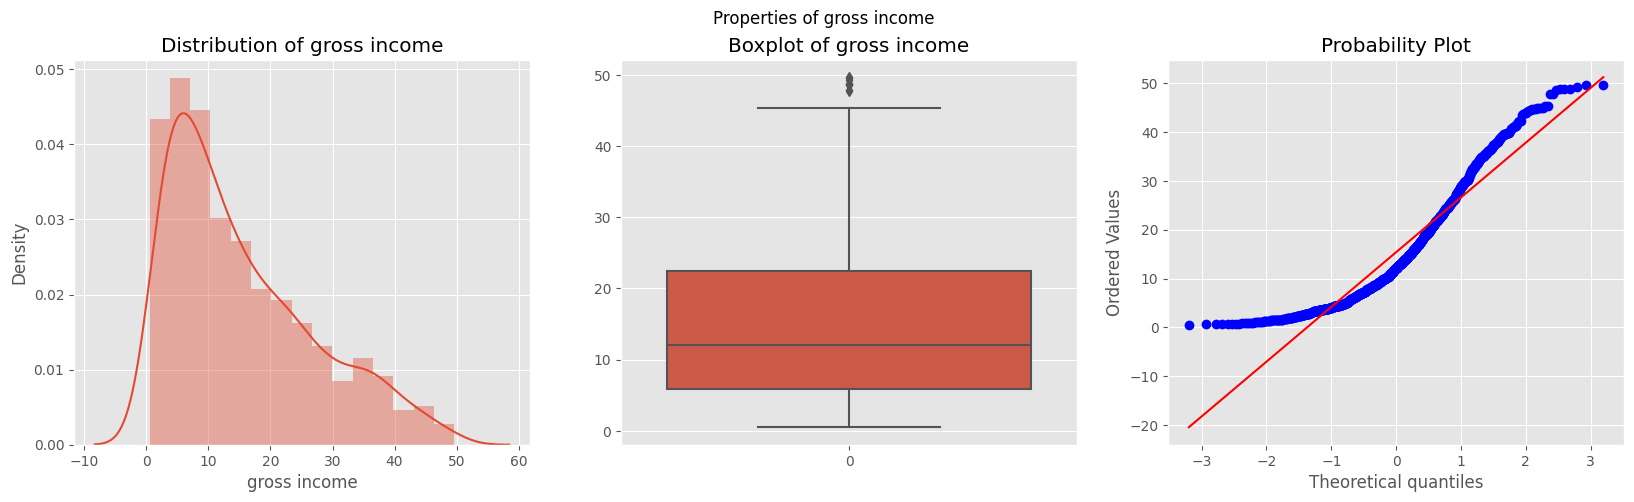

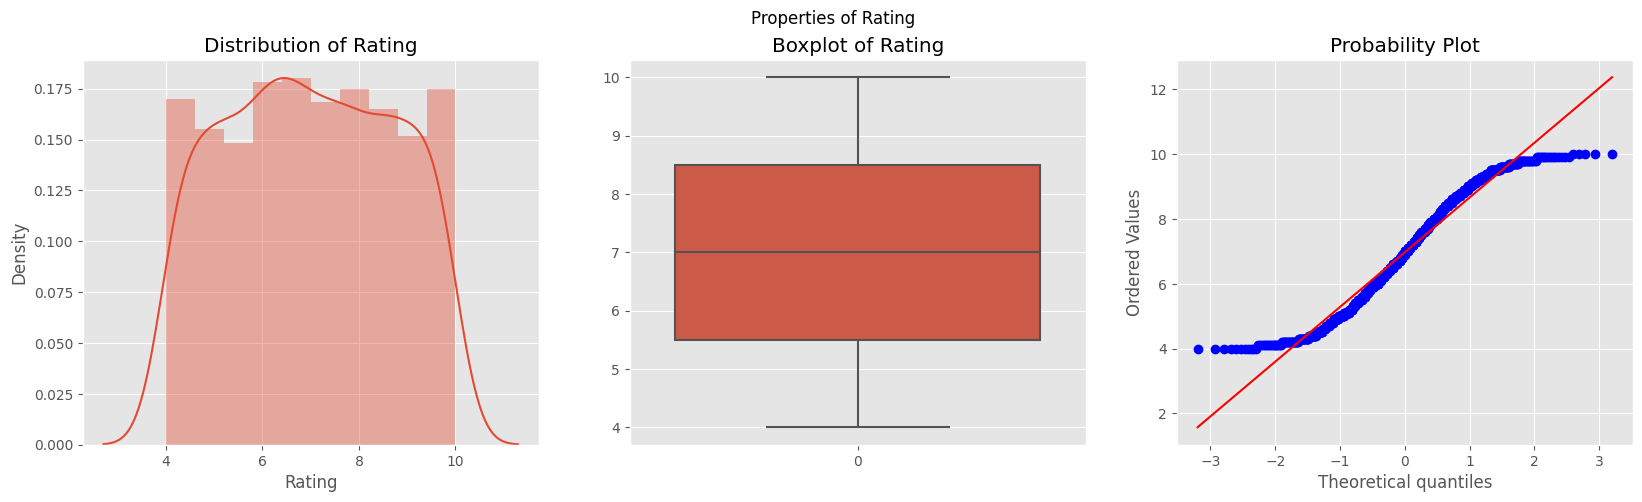

In [15]:
for feature in NumericalFeatures:
  ShowNumericFeatureProperties(feature)

In [16]:
IQR = df['Total'].quantile(0.75) - df['Total'].quantile(0.25)
MAX = df['Total'].quantile(0.75) + 1.5 * IQR

ExtremeTotalTransactions = df.loc[df['Total']>=MAX]

# This are the extreme 9 transations that need to be analyse later

In [17]:
dict(df['Gender'].value_counts())

{'Female': 501, 'Male': 499}

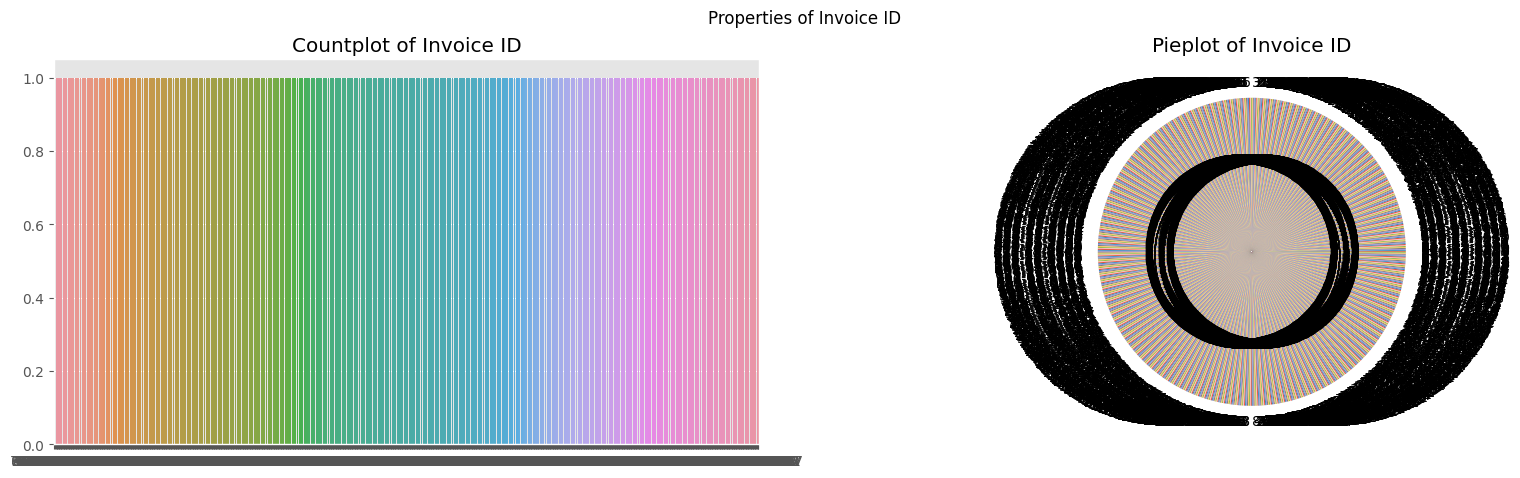

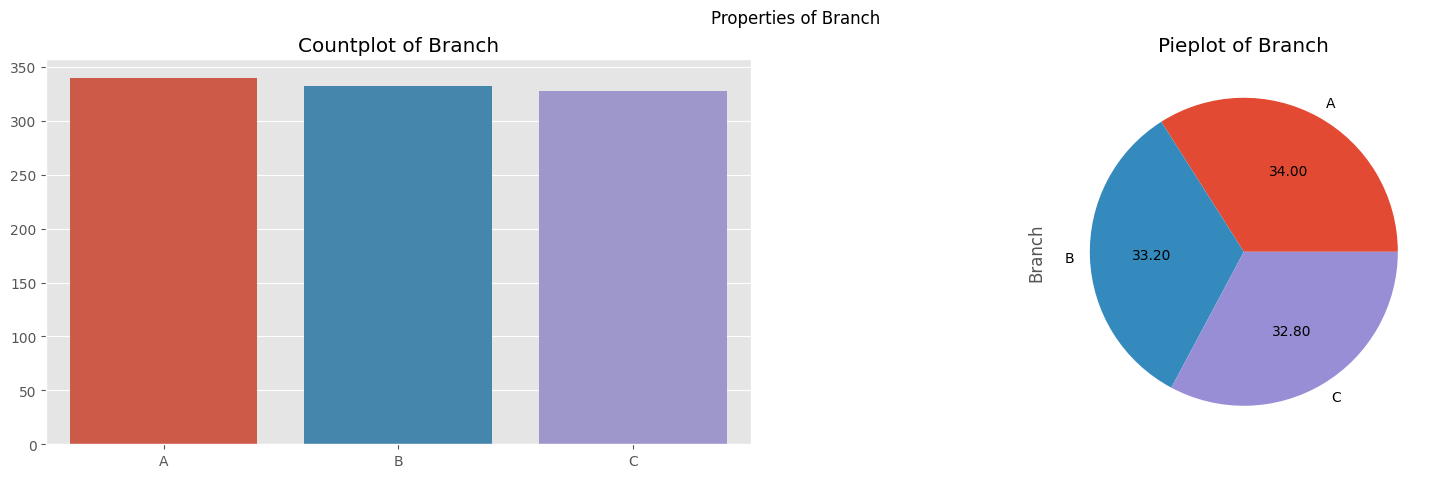

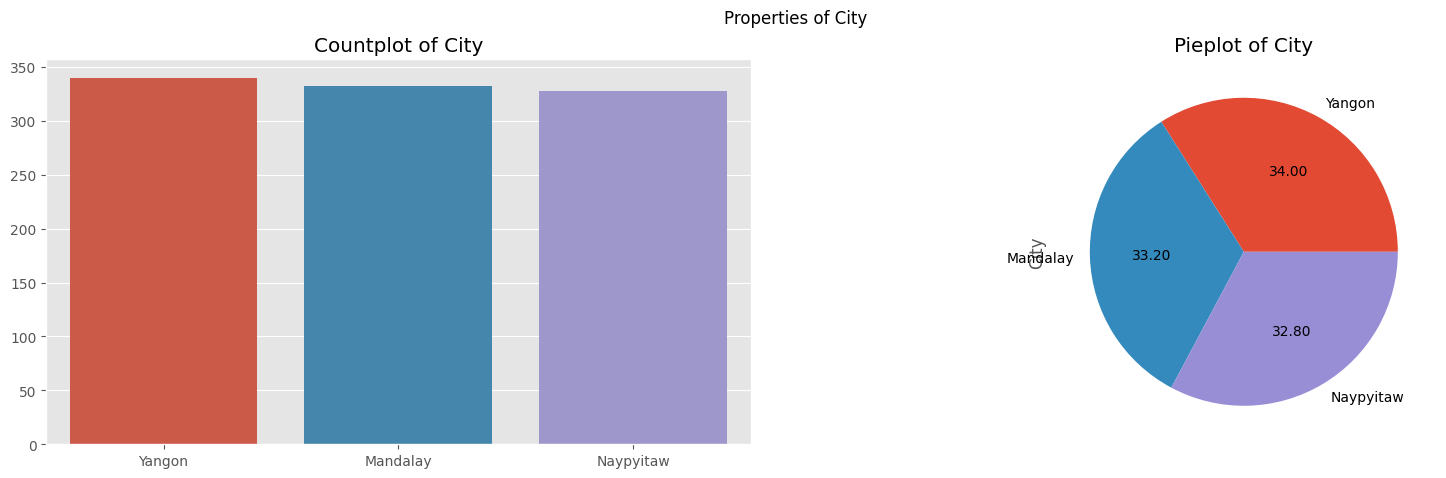

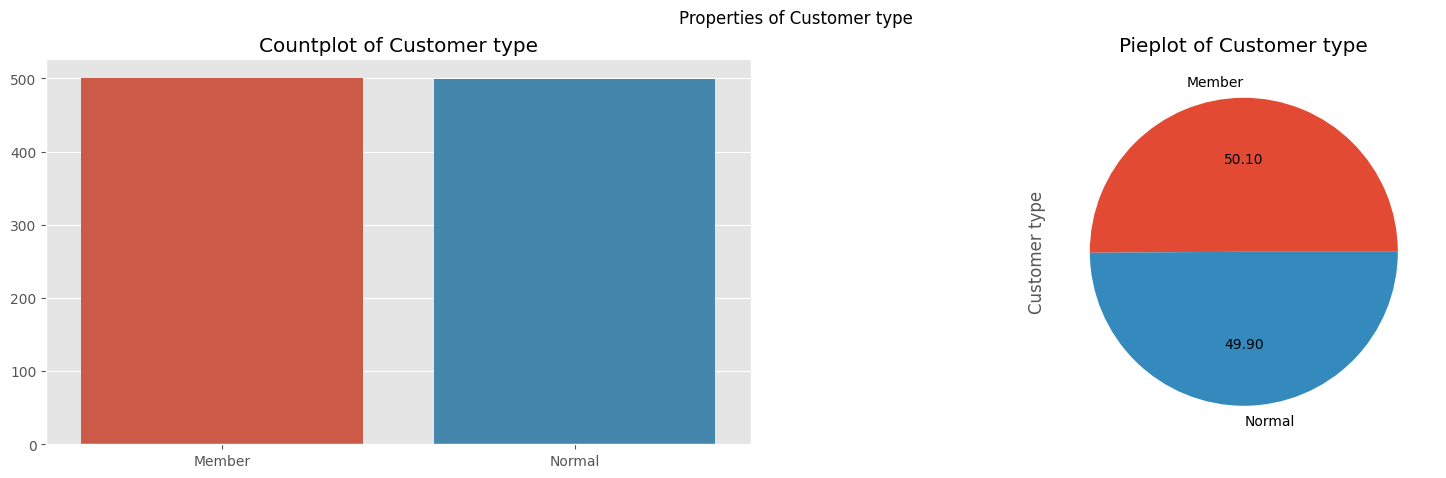

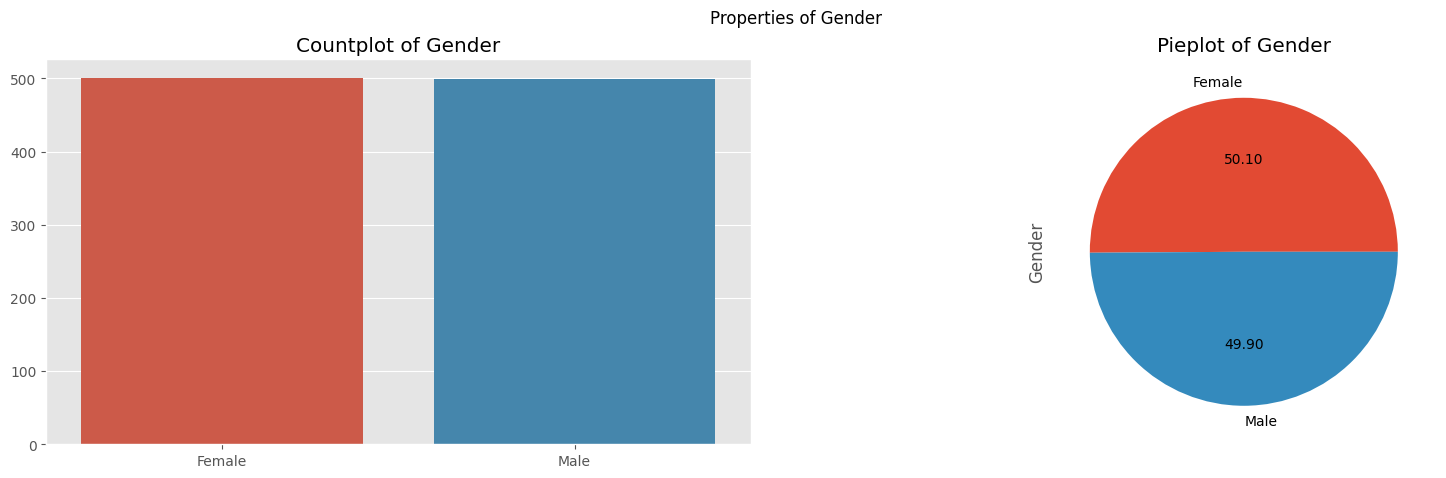

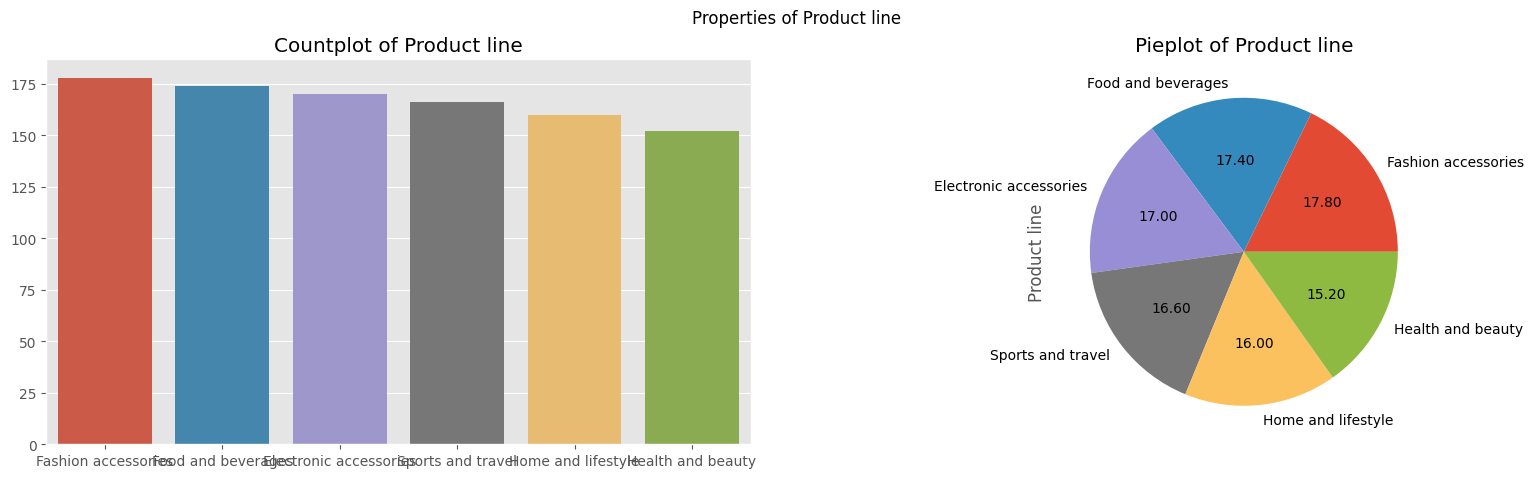

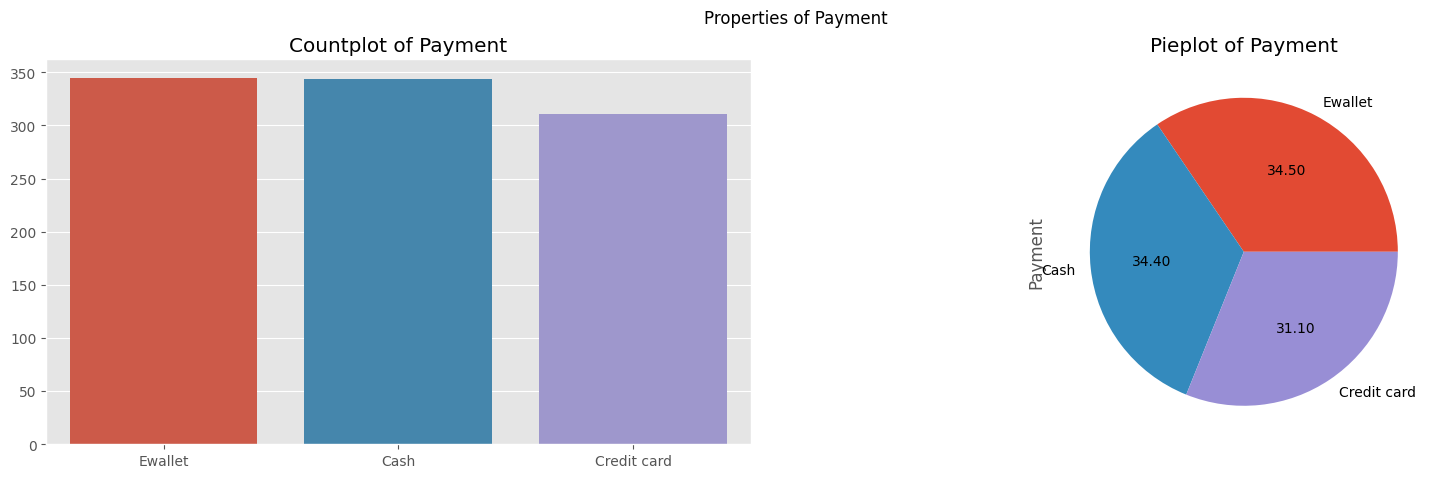

In [18]:
for feature in CategoricalFeatures:
  if not feature == 'Time':
    ShowCategoricalFeatureProperties(feature)


## Observations
  - Outliers need to investigate
  - Skewed Target and independent features (Positive skewed)
  - Categorical features are balanced

## Experimenting with Only Numeric Columns

In [19]:
numeric_df = df[NumericalFeatures]

<Axes: >

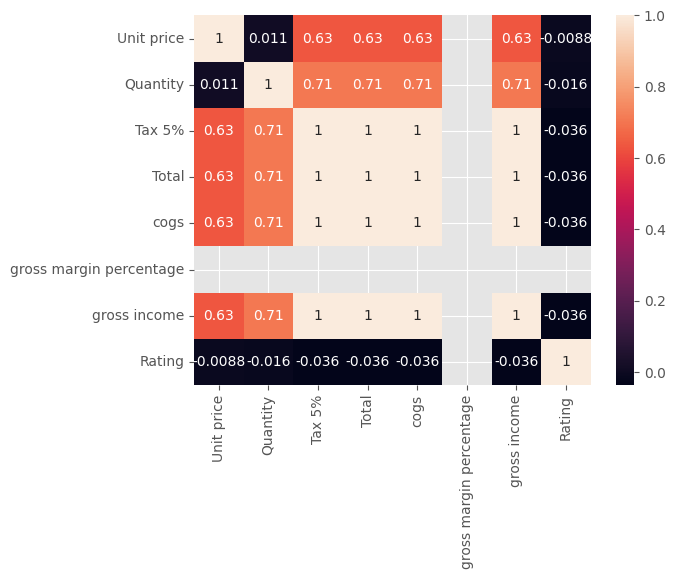

In [20]:
sns.heatmap(numeric_df.corr(),annot=True)

<Figure size 1000x500 with 0 Axes>

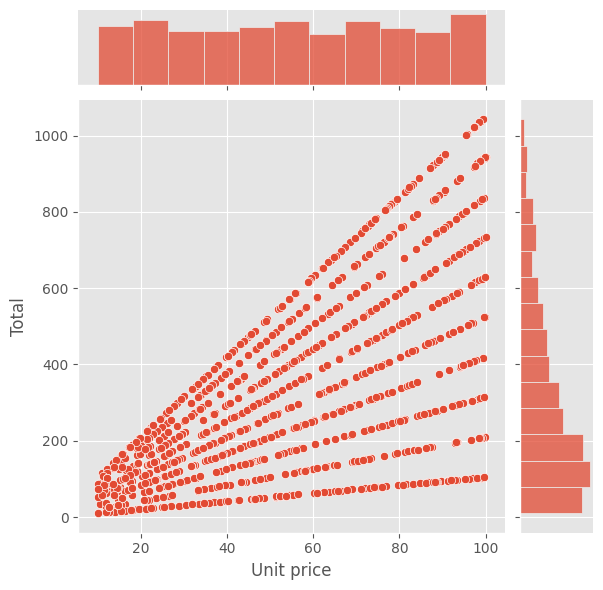

<Figure size 1000x500 with 0 Axes>

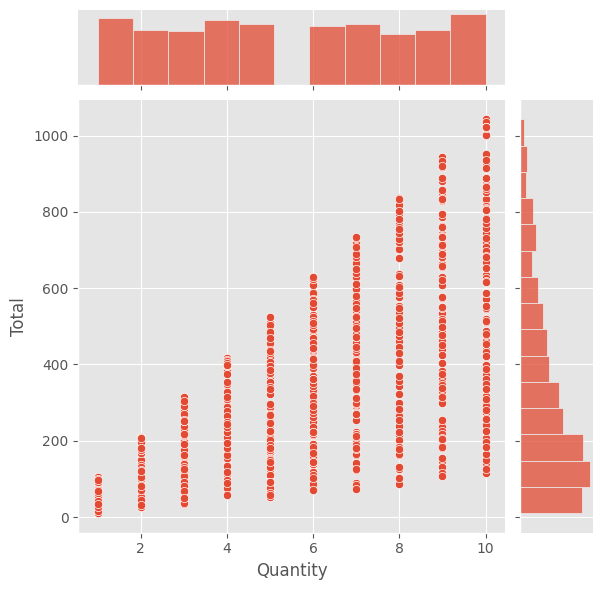

<Figure size 1000x500 with 0 Axes>

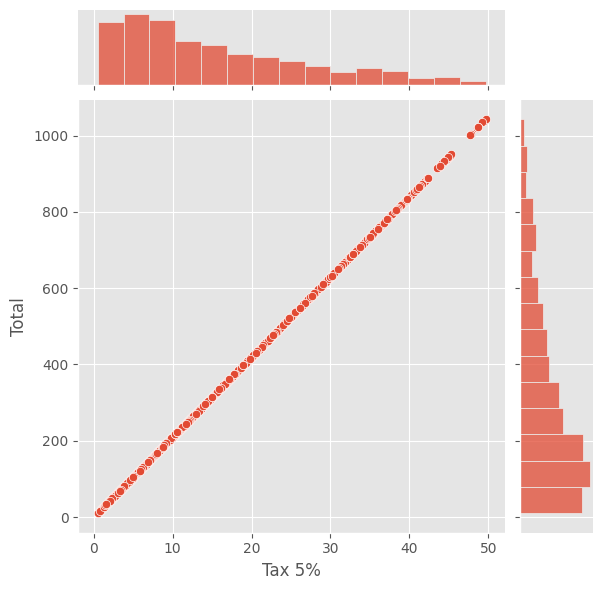

<Figure size 1000x500 with 0 Axes>

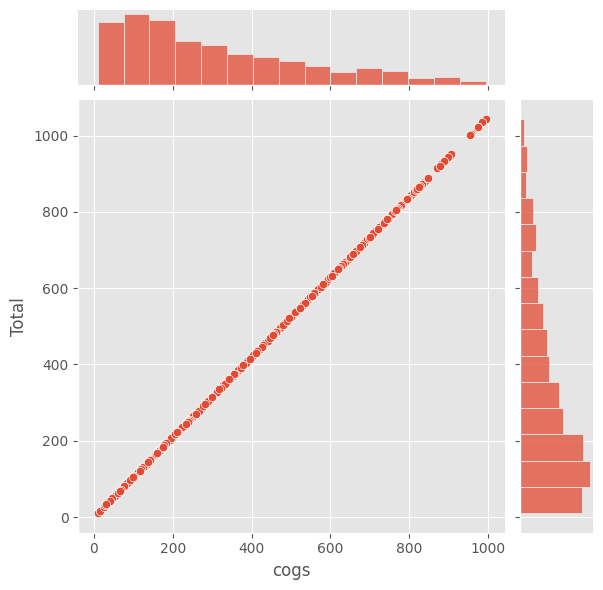

<Figure size 1000x500 with 0 Axes>

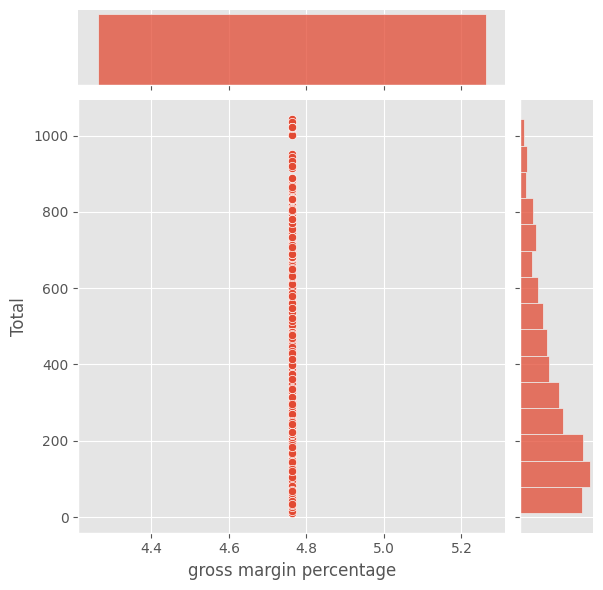

<Figure size 1000x500 with 0 Axes>

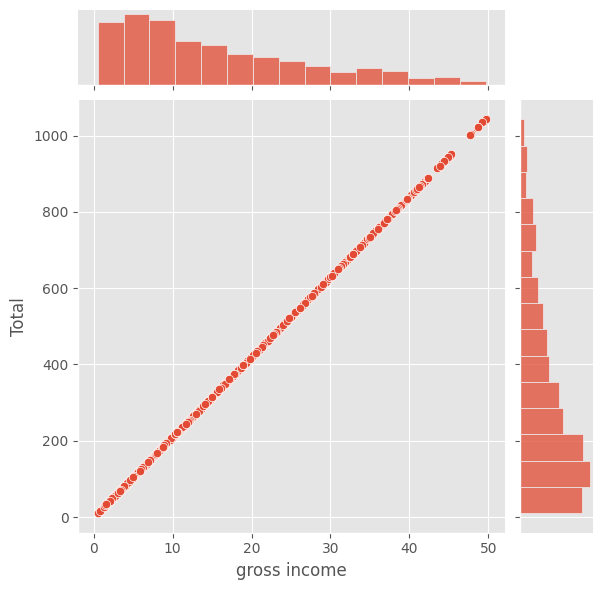

<Figure size 1000x500 with 0 Axes>

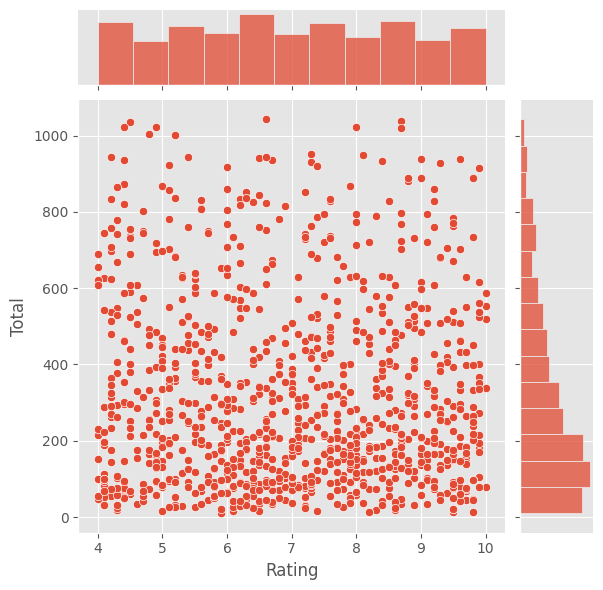

In [21]:
for feature in numeric_df.columns:
  if not feature == 'Total':
    plt.figure(figsize=(10,5))
    sns.jointplot(data=numeric_df,x=numeric_df[feature],y=numeric_df['Total'])
    plt.show()

In [60]:
def BeforeAndAfterTransformation(feature,data,transformer=None):
  fig = plt.figure(figsize=(20, 6))

  fig.suptitle(f'Before Transformation {feature}, mean : {np.round(data[feature].mean(),2)}, median : {np.round(data[feature].median(),2)}, std : {np.round(data[feature].std(),2)} ' ,fontsize=12)
  gs = fig.add_gridspec(10, 4)

  ax1 = fig.add_subplot(gs[:4, :])
  ax1.set_title(f'Distribution Plot {feature}',fontsize=10)
  sns.distplot(data[feature],ax=ax1)

  ax2 = fig.add_subplot(gs[5:, :2])
  ax2.set_title(f'Boxplot Plot {feature}',fontsize=10)
  sns.boxplot(x=df[feature],ax=ax2)

  ax3 = fig.add_subplot(gs[5:, 2:])
  ax3.set_title(f'Histogram Plot {feature}',fontsize=10)
  ax3.hist(x=df[feature])

  plt.show()


  fig = plt.figure(figsize=(20, 6))

  fig.suptitle(f'After Transformation {feature}, mean : {np.round(transformer(data[feature]).mean(),2)}, median : {np.round(transformer(data[feature]).median(),2)}, std : {np.round(transformer(data[feature]).std(),2)}')
  gs = fig.add_gridspec(10, 4)

  ax1 = fig.add_subplot(gs[:4, :])
  ax1.set_title(f'Distribution Plot {feature}',fontsize=10)
  sns.distplot(transformer(data[feature]),ax=ax1)

  ax2 = fig.add_subplot(gs[5:, :2])
  ax2.set_title(f'Boxplot Plot {feature}',fontsize=10)
  sns.boxplot(x=transformer(data[feature]),ax=ax2)

  ax3 = fig.add_subplot(gs[5:, 2:])
  ax3.set_title(f'Histogram Plot {feature}',fontsize=10)
  ax3.hist(x=transformer(data[feature]))

  plt.show()

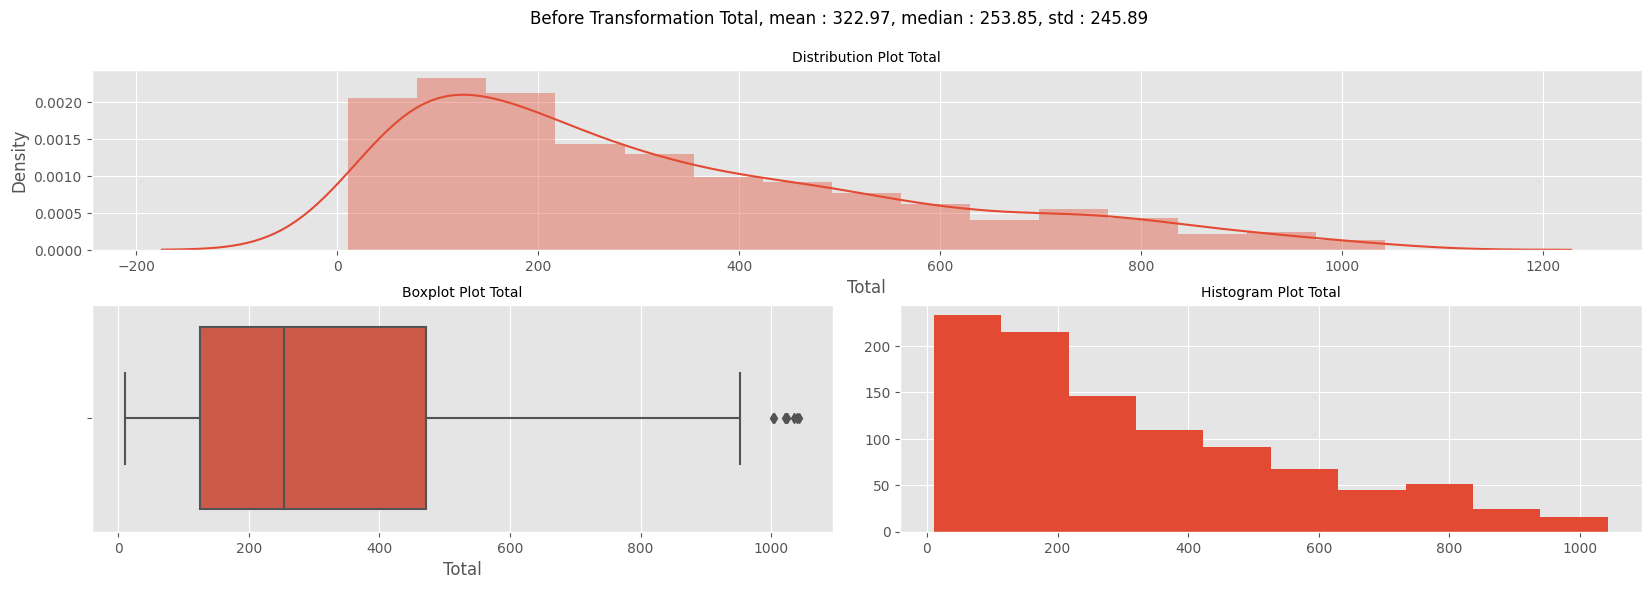

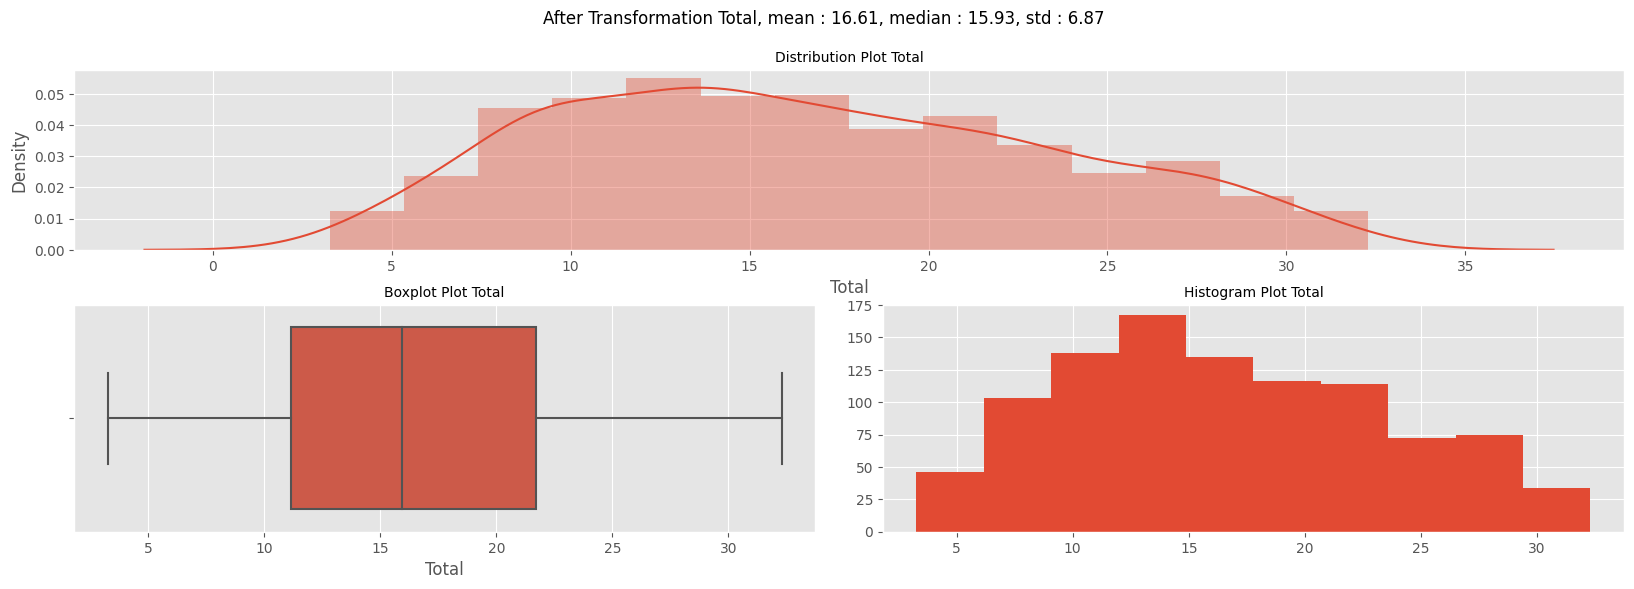

In [23]:
BeforeAndAfterTransformation('Total',numeric_df,np.sqrt)

In [28]:
numeric_df.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

Numerical Features  
 - cogs sqrt
 - gross income sqrt
 - Tax 5% sqrt

In [65]:
transform_df = numeric_df.copy()
transform_df['cogs'] = np.sqrt(numeric_df['cogs'])
transform_df['gross income'] = np.sqrt(numeric_df['gross income'])
transform_df['Tax 5%'] = np.sqrt(numeric_df['Tax 5%'])

In [66]:
X,y = transform_df.drop('Total',axis=1),transform_df['Total']
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.30, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [67]:
X_train.shape,X_val.shape,X_test.shape

((700, 7), (150, 7), (150, 7))

In [70]:
pipe = Pipeline([('PolynomialFeatures',PolynomialFeatures(degree=2,include_bias=False)),
    ('StandardScaler',StandardScaler()),
    ('LinearRegression',LinearRegression())
    ])

In [71]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('PolynomialFeatures', PolynomialFeatures(include_bias=False)),
                ('StandardScaler', StandardScaler()),
                ('LinearRegression', LinearRegression())])

In [72]:
X_val_predictions = pipe.predict(X_val)

In [84]:
np.sqrt(mean_squared_error(y_val,X_val_predictions))

4.054780048964771e-13

In [78]:
pipe['LinearRegression'].coef_

array([ 4.73480956e-14, -9.23705556e-14,  5.96792180e-14, -4.18091657e-14,
       -3.55271368e-15,  1.34939402e-14, -3.92080164e-14, -1.20888764e-14,
        3.49790919e+01,  3.38115801e-14, -1.97565188e-14,  9.26323547e-16,
        4.80224348e-14, -1.36267207e-14,  3.01184325e-14,  1.87509616e-14,
       -2.33681649e-14, -1.47289426e-13,  1.34218911e-14, -5.66933188e-15,
        3.49790919e+01,  3.49790919e+01,  4.14022120e-14,  3.49790919e+01,
       -4.94468899e-14,  3.49790919e+01, -1.52051630e-14,  3.49790919e+01,
       -1.55376166e-13,  0.00000000e+00,  4.14022120e-14, -1.97609956e-14,
        3.49790919e+01, -8.88178420e-15, -1.62536651e-13])

In [81]:
param_grid = {
    'PolynomialFeatures__degree':[2,3,4]
}

In [85]:
GridSCV = GridSearchCV(pipe,param_grid,scoring='neg_root_mean_squared_error',cv=10,)

In [86]:
GridSCV.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('PolynomialFeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('StandardScaler', StandardScaler()),
                                       ('LinearRegression',
                                        LinearRegression())]),
             param_grid={'PolynomialFeatures__degree': [2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [87]:
GridSCV.best_params_

{'PolynomialFeatures__degree': 3}

In [88]:
GridSCV.best_score_

-2.2894614611787543e-13

In [89]:
X_val_predictions = GridSCV.predict(X_val)

In [90]:
np.sqrt(mean_squared_error(y_val,X_val_predictions))

2.5811029278257483e-13

In [91]:
r2_score(y_val,X_val_predictions)

1.0

In [99]:
param_grid = {
    'PolynomialFeatures__degree':[2,3,4],
    'Ridge__alpha':np.linspace(0.0001,0.5,50)
}

In [100]:
ridge_pipe = Pipeline([('PolynomialFeatures',PolynomialFeatures(degree=2,include_bias=False)),
    ('StandardScaler',StandardScaler()),
    ('Ridge',Ridge())
    ])

In [103]:
GridSCV = GridSearchCV(ridge_pipe,param_grid,scoring='neg_root_mean_squared_error',cv=10)

In [104]:
GridSCV.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('PolynomialFeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('StandardScaler', StandardScaler()),
                                       ('Ridge', Ridge())]),
             param_grid={'PolynomialFeatures__degree': [2, 3, 4],
                         'Ridge__alpha': array([1.00000000e-04, 1.03020408e-02, 2.05040816e-02, 3.07061224e-02,
       4.09081633e-02, 5.11102041e-02, 6.13122449e-02, 7.15142857e...
       2.85757143e-01, 2.95959184e-01, 3.06161224e-01, 3.16363265e-01,
       3.26565306e-01, 3.36767347e-01, 3.46969388e-01, 3.57171429e-01,
       3.67373469e-01, 3.77575510e-01, 3.87777551e-01, 3.97979592e-01,
       4.08181633e-01, 4.18383673e-01, 4.28585714e-01, 4.38787755e-01,
       4.48989796e-01, 4.59191837e-01, 4.69393878e-01, 4.79595918e-01,
       4.89797959e-01, 5.00000000e-01])},
             scoring='neg_root_mean_squared_error')

In [108]:
GridSCV.best_params_

{'PolynomialFeatures__degree': 2, 'Ridge__alpha': 0.0001}

In [109]:
GridSCV.best_score_

-0.0006914059011730257

In [105]:
X_val_predictions = GridSCV.predict(X_val)

In [106]:
np.sqrt(mean_squared_error(y_val,X_val_predictions))

0.0006284024420781728

In [107]:
r2_score(y_val,X_val_predictions)

0.999999999993601

In [110]:
param_grid = {
    'PolynomialFeatures__degree':[2,3,4],
    'Lasso__alpha':np.linspace(0.0001,0.5,50)
}

In [111]:
lasso_pipe = Pipeline([('PolynomialFeatures',PolynomialFeatures(degree=2,include_bias=False)),
    ('StandardScaler',StandardScaler()),
    ('Lasso',Lasso(max_iter=10000))
    ])

In [112]:
GridSCV = GridSearchCV(lasso_pipe,param_grid,scoring='neg_root_mean_squared_error',cv=10)

In [113]:
GridSCV.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('PolynomialFeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('StandardScaler', StandardScaler()),
                                       ('Lasso', Lasso(max_iter=10000))]),
             param_grid={'Lasso__alpha': array([1.00000000e-04, 1.03020408e-02, 2.05040816e-02, 3.07061224e-02,
       4.09081633e-02, 5.11102041e-02, 6.13122449e-02, 7.15142857e-02,
       8.17163265e-02, 9.19...
       2.85757143e-01, 2.95959184e-01, 3.06161224e-01, 3.16363265e-01,
       3.26565306e-01, 3.36767347e-01, 3.46969388e-01, 3.57171429e-01,
       3.67373469e-01, 3.77575510e-01, 3.87777551e-01, 3.97979592e-01,
       4.08181633e-01, 4.18383673e-01, 4.28585714e-01, 4.38787755e-01,
       4.48989796e-01, 4.59191837e-01, 4.69393878e-01, 4.79595918e-01,
       4.89797959e-01, 5.00000000e-01]),
                         'PolynomialFeatures__degree': [2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [114]:
GridSCV.best_params_

{'Lasso__alpha': 0.020504081632653062, 'PolynomialFeatures__degree': 2}

In [115]:
GridSCV.best_score_

-0.020472559226129

In [138]:
GridSCV.best_estimator_['Lasso'].coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.40156028e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.36160293e-02,  0.00000000e+00,  0.00000000e+00,  1.19269674e-16,
        0.00000000e+00,  4.64349558e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [139]:
X_val_predictions = GridSCV.best_estimator_.predict(X_val)

In [140]:
np.sqrt(mean_squared_error(y_val,X_val_predictions))

0.02080295250556031

In [141]:
r2_score(y_val,X_val_predictions)

0.9999999929872451

In [147]:
X_test_predictions = GridSCV.best_estimator_.predict(X_test)

In [149]:
np.sqrt(mean_squared_error(y_test,X_test_predictions))

0.020739112212777133

In [150]:
r2_score(y_test,X_test_predictions)

0.9999999928685792